# 1. Conventional analysis of a scRNA-seq data

In [ ]:
%pip install umap
%pip install scanpy
%pip install 'scanpy[leiden]'
%pip install louvain

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('./src')
import utils as my_u
from utils import data_transformation
from utils import clustering
from utils import h5_data_loader
#import scanpy.api as sc
import anndata as ad
import scanpy as sc
import logging
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
import umap

## Baron: Scanpy-HVG

In [3]:
datasets = ['./dataset/baron_sc.h5']
label_filter = ['epsilon', 'alpha', 'beta', 'duct', 'activated', 'schwann', 'gamma', 'quiescent', 'delta', 'macrophage', 'endothelial', 'acinar', 'mast']
X_, y_, b_, file_names = h5_data_loader(datasets, label_filter)
logging.info(f'Data loaded. {datasets}')

In [4]:
adata = ad.AnnData(X_, dtype=np.int32)
adata.obs["label"] = y_
#adata.obs["batch"] = b_
batch_key = "batch"
label_key = "label"                                                                                                                           
adata.uns[batch_key + "_colors"] = [ 
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#999999",
    "#ff00ff",
]  # Set custom colours for batches
#sc.pp.neighbors(adata)
#sc.tl.umap(adata)
#sc.pl.umap(adata, color=[label_key, batch_key], wspace=1, save='batch.pdf')


sc.pp.filter_genes(adata, min_cells=1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0

true = adata.obs["label"]
best = (0,0,0,0)
for res in np.arange(0.1, 3.01, 0.1):
    sc.tl.louvain(adata, resolution = res, key_added = "louvain_"+str(res))
    pred = adata.obs['louvain_'+str(res)]
    nmi = normalized_mutual_info_score(pred, true, average_method="arithmetic")
    label_ari = adjusted_rand_score(pred, y_)
    #batch_ari = adjusted_rand_score(pred, b_)
    if best[1] < nmi:
        best = (res, nmi, -1, label_ari)
print(best)


(0.2, 0.9181648866263212, -1, 0.9525115188640726)


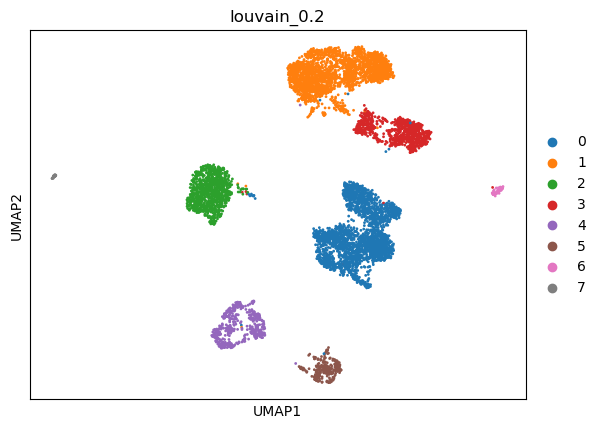

In [9]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain_0.2'])


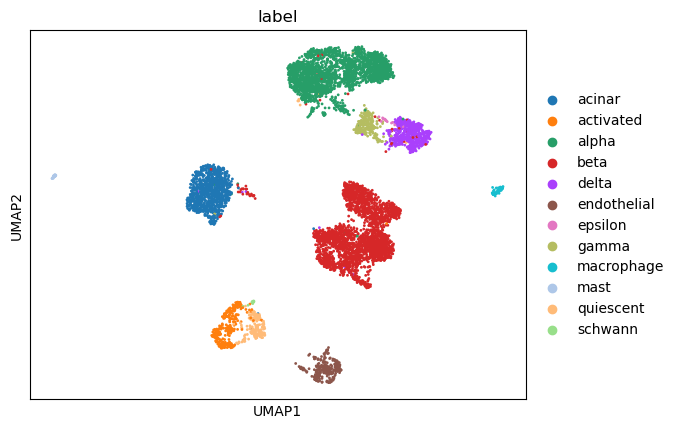

In [10]:
sc.pl.umap(adata, color=['label'])


## Muraro: Scanpy-HVG

In [5]:
datasets = ['./dataset/muraro_sc.h5']
label_filter = ['epsilon', 'alpha', 'beta', 'duct', 'activated', 'schwann', 'gamma', 'quiescent', 'delta', 'macrophage', 'endothelial', 'acinar', 'mast']
X_, y_, b_, file_names = h5_data_loader(datasets, label_filter)
logging.info(f'Data loaded. {datasets}')

In [6]:
adata = ad.AnnData(X_, dtype=np.int32)
adata.obs["label"] = y_
#adata.obs["batch"] = b_
batch_key = "batch"
label_key = "label"                                                                                                                           
adata.uns[batch_key + "_colors"] = [ 
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#999999",
    "#ff00ff",
]  # Set custom colours for batches
#sc.pp.neighbors(adata)
#sc.tl.umap(adata)
#sc.pl.umap(adata, color=[label_key, batch_key], wspace=1, save='batch.pdf')


sc.pp.filter_genes(adata, min_cells=1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0

true = adata.obs["label"]
best = (0,0,0,0)
for res in np.arange(0.1, 3.01, 0.1):
    sc.tl.louvain(adata, resolution = res, key_added = "louvain_"+str(res))
    pred = adata.obs['louvain_'+str(res)]
    nmi = normalized_mutual_info_score(pred, true, average_method="arithmetic")
    label_ari = adjusted_rand_score(pred, y_)
    #batch_ari = adjusted_rand_score(pred, b_)
    if best[1] < nmi:
        best = (res, nmi, -1, label_ari)
print(best)


(0.30000000000000004, 0.8825649605389162, -1, 0.9225919369280793)


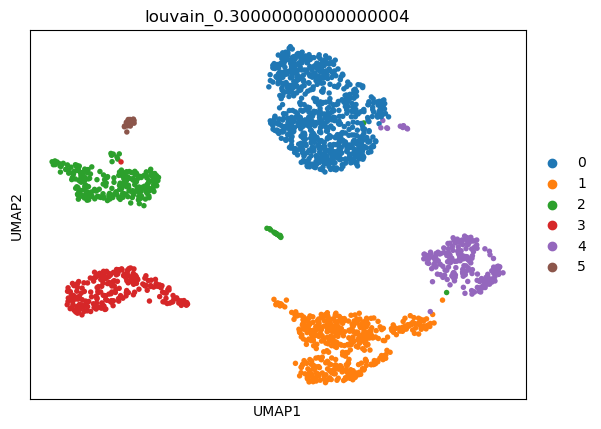

In [8]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain_0.30000000000000004'])

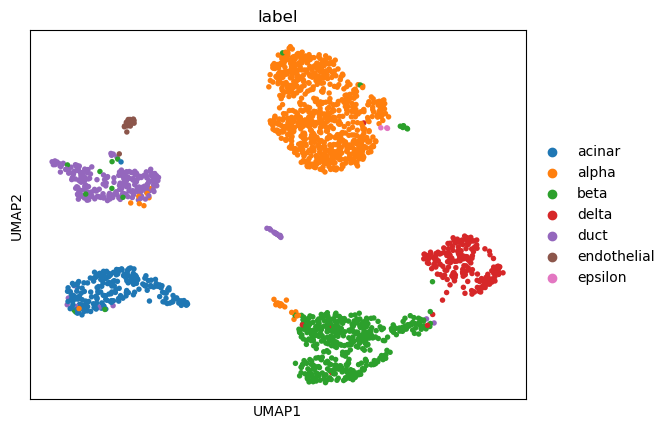

In [9]:
sc.pl.umap(adata, color=['label'])

## Segerstolpe: Scanpy-HVG

In [ ]:
datasets = ['./dataset/segerstolpe_sc.h5']
label_filter = ['epsilon', 'alpha', 'beta', 'duct', 'activated', 'schwann', 'gamma', 'quiescent', 'delta', 'macrophage', 'endothelial', 'acinar', 'mast']
X_, y_, b_, file_names = h5_data_loader(datasets, label_filter)
logging.info(f'Data loaded. {datasets}')

In [ ]:
adata = ad.AnnData(X_, dtype=np.int32)
adata.obs["label"] = y_
#adata.obs["batch"] = b_
batch_key = "batch"
label_key = "label"                                                                                                                           
adata.uns[batch_key + "_colors"] = [ 
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#999999",
    "#ff00ff",
]  # Set custom colours for batches
#sc.pp.neighbors(adata)
#sc.tl.umap(adata)
#sc.pl.umap(adata, color=[label_key, batch_key], wspace=1, save='batch.pdf')


sc.pp.filter_genes(adata, min_cells=1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0

true = adata.obs["label"]
best = (0,0,0,0)
for res in np.arange(0.1, 3.01, 0.1):
    sc.tl.louvain(adata, resolution = res, key_added = "louvain_"+str(res))
    pred = adata.obs['louvain_'+str(res)]
    nmi = normalized_mutual_info_score(pred, true, average_method="arithmetic")
    label_ari = adjusted_rand_score(pred, y_)
    #batch_ari = adjusted_rand_score(pred, b_)
    if best[1] < nmi:
        best = (res, nmi, -1, label_ari)
print(best)


(0.2, 0.9610960547043008, -1, 0.9719308283618725)


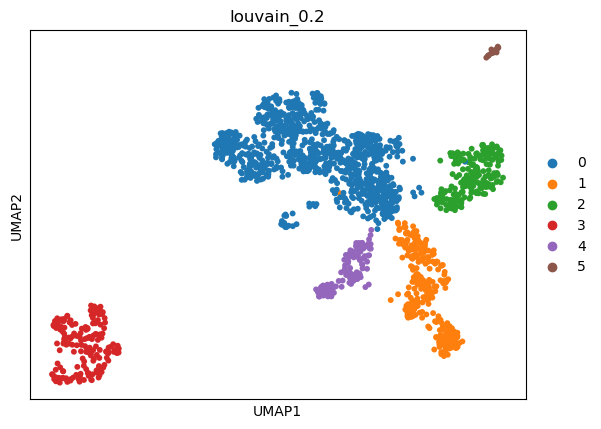

In [13]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain_0.2'])

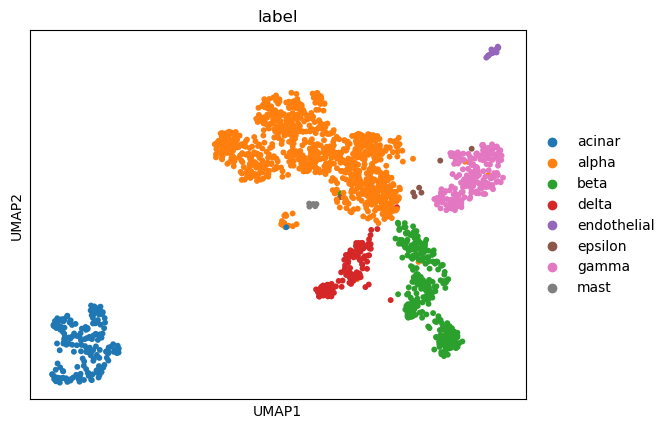

In [14]:
sc.pl.umap(adata, color=['label'])

## Wang: Scanpy-HVG

In [ ]:
datasets = ['./dataset/wang_sc.h5']
label_filter = ['epsilon', 'alpha', 'beta', 'duct', 'activated', 'schwann', 'gamma', 'quiescent', 'delta', 'macrophage', 'endothelial', 'acinar', 'mast']
X_, y_, b_, file_names = h5_data_loader(datasets, label_filter)
logging.info(f'Data loaded. {datasets}')

In [ ]:
adata = ad.AnnData(X_, dtype=np.int32)
adata.obs["label"] = y_
#adata.obs["batch"] = b_
batch_key = "batch"
label_key = "label"                                                                                                                           
adata.uns[batch_key + "_colors"] = [ 
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#999999",
    "#ff00ff",
]  # Set custom colours for batches
#sc.pp.neighbors(adata)
#sc.tl.umap(adata)
#sc.pl.umap(adata, color=[label_key, batch_key], wspace=1, save='batch.pdf')


sc.pp.filter_genes(adata, min_cells=1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0

true = adata.obs["label"]
best = (0,0,0,0)
for res in np.arange(0.1, 3.01, 0.1):
    sc.tl.louvain(adata, resolution = res, key_added = "louvain_"+str(res))
    pred = adata.obs['louvain_'+str(res)]
    nmi = normalized_mutual_info_score(pred, true, average_method="arithmetic")
    label_ari = adjusted_rand_score(pred, y_)
    #batch_ari = adjusted_rand_score(pred, b_)
    if best[1] < nmi:
        best = (res, nmi, -1, label_ari)
print(best)


(1.0, 0.5240343182001496, -1, 0.5236983855183179)


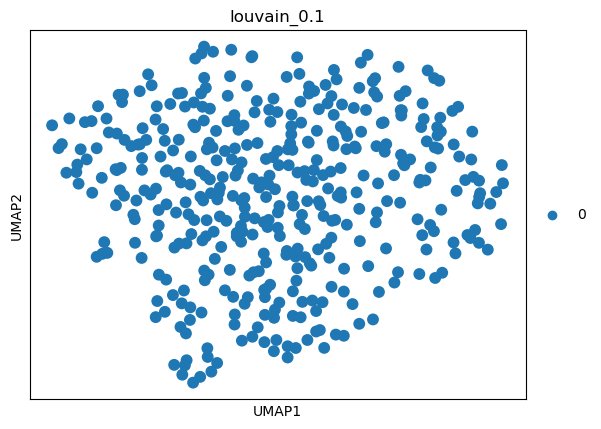

In [18]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain_0.1'])

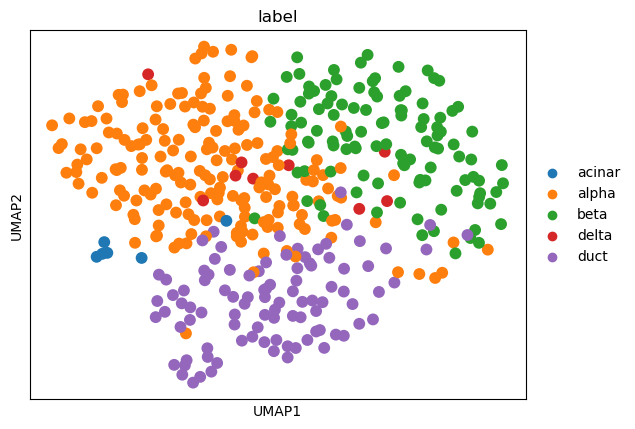

In [19]:
sc.pl.umap(adata, color=['label'])

## Xin: Scanpy-HVG

In [21]:
datasets = ['./dataset/xin_sc.h5']
label_filter = ['epsilon', 'alpha', 'beta', 'duct', 'activated', 'schwann', 'gamma', 'quiescent', 'delta', 'macrophage', 'endothelial', 'acinar', 'mast']
X_, y_, b_, file_names = h5_data_loader(datasets, label_filter)
logging.info(f'Data loaded. {datasets}')

In [22]:
adata = ad.AnnData(X_, dtype=np.int32)
adata.obs["label"] = y_
#adata.obs["batch"] = b_
batch_key = "batch"
label_key = "label"                                                                                                                           
adata.uns[batch_key + "_colors"] = [ 
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#999999",
    "#ff00ff",
]  # Set custom colours for batches
#sc.pp.neighbors(adata)
#sc.tl.umap(adata)
#sc.pl.umap(adata, color=[label_key, batch_key], wspace=1, save='batch.pdf')


sc.pp.filter_genes(adata, min_cells=1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0

true = adata.obs["label"]
best = (0,0,0,0)
for res in np.arange(0.1, 3.01, 0.1):
    sc.tl.louvain(adata, resolution = res, key_added = "louvain_"+str(res))
    pred = adata.obs['louvain_'+str(res)]
    nmi = normalized_mutual_info_score(pred, true, average_method="arithmetic")
    label_ari = adjusted_rand_score(pred, y_)
    #batch_ari = adjusted_rand_score(pred, b_)
    if best[1] < nmi:
        best = (res, nmi, -1, label_ari)
print(best)


(0.4, 0.626719166892187, -1, 0.6848330417249461)


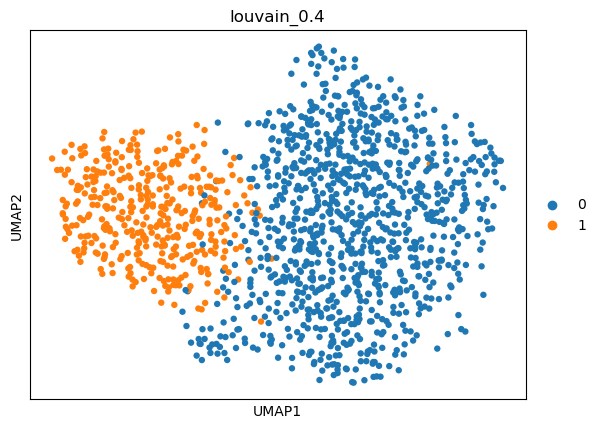

In [23]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain_0.4'])

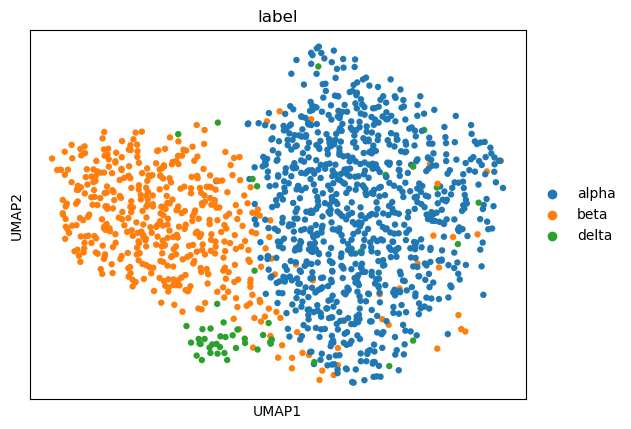

In [24]:
sc.pl.umap(adata, color=['label'])